# **Introducción a la visualización de datos: Distribuciones**

Si tomamos el valor mínimo y el valor máximo de nuestro conjunto de datos tenemos el rango dentro del cual están contenidos todos nuestros datos. Pero dentro de ese rango los valores pueden estar distribuidos de muchas maneras distintas. A veces están muy cerca del valor mínimo, a veces están muy cerca del valor máximo; a veces se amontonan casi todos alrededor de la mediana y sólo unos pocos toman los valores extremos; a veces generan incluso dos "montículos" alrededor de los cuales se concentran la mayoría de los datos. Hay muchísimas posibilidades.

Usando valores individuales es imposible tener una idea general de nuestro conjunto y es por eso que solemos utilizar algunas técnicas que toman en cuenta todo el conjunto de datos al mismo tiempo. Hoy vamos a aprender cómo a través de la visualización de datos podemos darnos una idea mucho más precisa de cómo están organizados los datos en nuestro conjunto.

**BOXPLOTS**

Los Boxplots (o diagramas de caja) son una manera de visualizar nuestros datos de forma que la organización de los percentiles se haga muy evidente.

Los Boxplots nos ayudan a discernir si nuestros datos están sesgados (si tienen una tendencia), si están dispersos o agrupados y si existen valores atípicos con valores extremos. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)


<AxesSubplot:xlabel='price'>

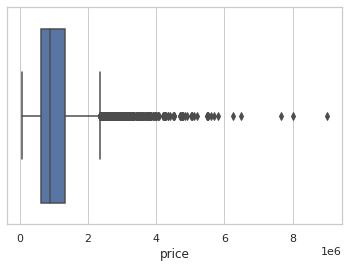

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])

¿Qué significa todo esto?

* La caja está delimitada por 2 valores: El percentil 25 y el percentil 75.
* La línea vertical dentro de la caja indica el percentil 50 (o sea, la mediana).
* Los "bigotes" intentan abarcar el resto de los datos a la izquierda y derecha de la caja, PERO no se extienden más allá de una distancia equivalente a 1.5 * Rango Intercuartílico. Como bien recordarás, el rango intercuartílico es la diferencia entre el percentil 75 y el percentil 25. Si multiplicamos 1.5 por ese Rango Intercuartílico obtenemos el tamaño máximo de los bigotes.
* Los puntos individuales que están fuera de los bigotes son, obviamente, las muestras cuyo valor excede el tamaño máximo de los bigotes. No podemos tomar esto como una "Regla Absoluta", pero en general se considera que estos valores son los valores atípicos de nuestro conjunto.

Como puedes ver, esta gráfica nos da muchísima información muy útil.

* Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 2 000 000 y que los precios muy altos son anomalías en nuestro conjunto.
* Sabemos que, dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
*También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

Vamos a ver qué pasa si graficamos una línea vertical justo donde está el promedio de nuestros datos. Para esto vamos a usar matplotlib, otra librería de visualizaciones de datos que aprenderemos a detalle más adelante:

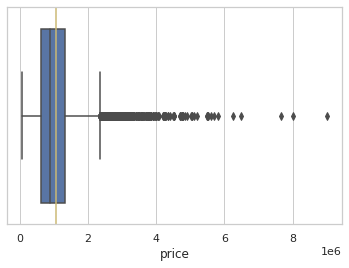

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])
plt.axvline(df['price'].mean(), c='y')

Como puedes ver, a pesar de los valores atípicos tan extremos, tenemos tantos valores en el rango menor de nuestros datos que el promedio queda bastante cercano a la mediana.

Los valores atípicos pueden significar múltiples cosas:

* A veces son errores de medición
* A veces son errores humanos de transcripción
* Podrían ser simplemente anomalías naturales causadas por fenómenos aleatorios
* O podrían tener un significado más profundo: por ejemplo, la riqueza de alguien como Carlos Slim es una anomalía en este país, pero que es un indicador de desigualdad muy fuerte que nos da información útil acerca de la distribución de la riqueza

Decidir cómo lidiar con estos valores atípicos (si eliminarlos o dejarlos) depende totalmente del contexto.

Dado que nuestro análisis de este conjunto aún no es muy profundo, por el momento vamos a asumir la posición de eliminar estos datos, solamente para ver cómo se haría este proceso.

**Rango Intercuartílico y valores atípicos**

Podemos utilizar la medida que utiliza el boxplot para limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite. A esta medida se le suele llamar el Score de Rango Intercuartílico (IQR-Score). De esa manera estamos filtrando los valores atípicos (al menos lo que se considera valores atípicos bajo este esquema).



In [ ]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)


In [ ]:
filtro = df['price'] >= (df['price'].quantile(0.75) + 1.5*iqr)
df_filtrado = df[filtro]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

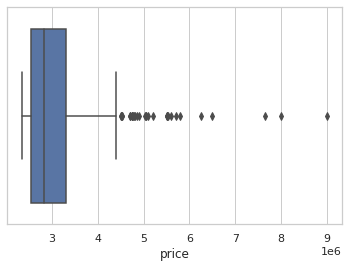

In [ ]:
sns.boxplot(df_filtrado['price'])

In [ ]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
filtro_inferior = df['price'] >500000
filtro_superior = df['price'] < 1500000

df_filtrado = df[filtro_inferior & filtro_superior]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

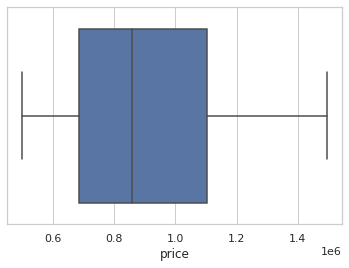

In [ ]:
sns.boxplot(df_filtrado['price'])


**RETO**

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

* Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'

* Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv', index_col=0)
c1 = df_1['estimated_diameter.meters.estimated_diameter_max']
c2 =  df_1['relative_velocity.kilometers_per_second']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estimated_diameter.meters.estimated_diameter_max'>

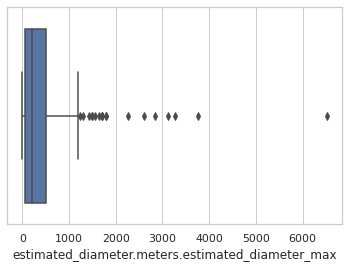

In [ ]:
sns.boxplot(c1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relative_velocity.kilometers_per_second'>

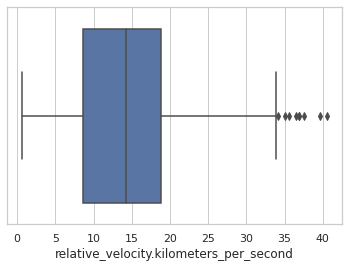

In [ ]:
sns.boxplot(c2)

**b) Eliminando valores atípicos**

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos antes y después de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

In [ ]:
iqr = c1.quantile(.75) - c1.quantile(.25)
filtrado_inferior = c1 >= c1.quantile(.25) - 1.5*iqr
filtrado_superior = c1 <= c1.quantile(.75) + 1.5*iqr
d_filtrado = df_1[filtrado_inferior & filtrado_superior]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estimated_diameter.meters.estimated_diameter_max'>

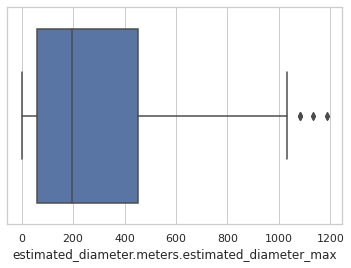

In [ ]:
sns.boxplot(d_filtrado['estimated_diameter.meters.estimated_diameter_max'])

**Tabla de frecuencias**



Los percentiles segmentan nuestros datos en segmentos de distinto tamaño en los que tenemos el mismo número de muestras. En cambio, las tablas de frecuencias segmentan nuestros datos en segmentos que miden lo mismo pero que contienen una cantidad distinta de muestras.

Esto puede darnos otra perspectiva de nuestros datos que también resulta muy útil. Vamos a aprender a generar una tabla de frecuencias usando pandas.



In [ ]:
prices = df['price']
prices.max() - prices.min()

Tomando en cuenta nuestro rango, vamos a decidir dividir nuestro conjunto en 20 segmentos. Usemos ahora nuestro método cut para segmentar nuestros datos.



In [ ]:
pd.cut(prices, 20)


¿Qué acaba de suceder? pd.cut toma el rango completo de nuestros datos, y luego crea 20 segmentos de igual tamaño. Después, revisa uno por uno nuestros datos, los ubica en uno de los segmentos y nos regresa una Serie donde tenemos cada índice clasificado en el segmento que lo toca.

Ahora, para dividir nuestro dataset por segmentos, podemos utilizar pd.groupby y pasarle la Serie que obtuvimos. Lo que hace groupby en este caso es leer la clasificación de cada índice y agruparlos de manera que todas las muestras que pertencen a la misma clasificación queden juntas.

Después de agruparlos, podemos usar un count para saber cuántas muestras hay en cada grupo:

In [ ]:
segmentos = pd.cut(prices, 20)

df['price'].groupby(segmentos).count()

**HISTOGRAMAS**

Vamos a generar un histograma segmentando nuestros datos en 20 segmentos (o bins).



In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
df.head()

In [ ]:
sns.set(style='white')

In [ ]:
sns.distplot(df['price'], kde=False, norm_hist=False, bins=20)


* La bandera kde=False evita que se grafique también la densidad de probabilidad (que veremos más adelante).
* norm_hist=False sirve para que nuestro eje y indique los conteos de nuestros segmentos.
* bins=20 indica el número de segmentos.

In [ ]:
sns.set(style='ticks')
sns.distplot(df['price'], kde=False, norm_hist=False, bins=100)

**DESCRIBIENDO HISTOGRAMAS**

In [ ]:
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis

sns.set(style='white')

Vamos a ver algunas formas comunes que pueden tener nuestros histogramas. Normalmente las gráficas que obtengamos con datos provenientes del mundo real no encajan a la perfección con estas formas, pero ayuda tener referencias para poder describir nuestras gráficas.

Solemos describir nuestros datos utilizando dos parámetros: asimetría y curtosis.

**a) Asimetría (skewness)**

La asimetría nos da una medida de la falta de simetría en una distribución. Una distribución es simétrica si se ve igual a la izquierda y derecha del punto central.

* Una asimetría de 0 indica que la simetría de la distribución es perfecta.

* Números positivos indican que hay una asimetría positiva, es decir que la cola de la derecha es más larga que la cola de la izquierda.

* Números negativos indican que hay una asimetría negativa, es decir que la cola de la izquierda es más larga que la cola de la derecha

**b) Curtosis (kurtosis)**

La curtosis es una medida de la dispersión de nuestros datos. La curtosis nos dice qué tan escarpada o achatada está nuestra distribución.

* Curtosis de 0 indica que la dispersión de nuestros datos es normal (más adelante aprenderemos exactamente qué significa esto).

* Curtosis positiva indica que nuestra distribución está achatada. Esto implica que hay más dispersión de nuestros datos, que están más lejanos de nuestro punto central y que por lo tanto tenemos colas largas (comparadas con la cola normal).

* Curtosis negativa indica que nuestra distribución está escarpada. Esto implica que hay menos dispersión de nuestros datos, que están más cercanos a nuestro punto central y que por lo tanto tenemos colas cortas (comparadas con la cola normal).

No todas las técnicas para medida curtosis establecen la normalidad en 0, pero nosotros vamos a utilizar la default en scipy y pandas.


Para calcular las medidas de curtosis y asimetría usaremos los métodos kurtosis y skew de la librería scipy.stats.

Usando estas definiciones estamos listos para visualizar algunas distribuciones con características distintas:

**Distribución Normal (Standard Normal)**

La distribución normal es una de las más famosas y más utilizadas. Muchos de los análisis estadísticos que hacemos toman a la distribución normal como un "estándar". Hay algunas medidas que incluso requieren que la distribución sea normal para funcionar. A través de este módulo nos toparemos varias veces con esta distribución y la exploraremos más a profundidad. Por el momento basta saber que la distribución normal tiene una asimetría de 0 y una curtosis de 0 (usando el método default de scipy y pandas.

Otra cosa interesante es que la distribución normal estándar tiene un promedio de 0, una mediana de 0, una moda de 0 y una desviación estándar de 1. Esto implica que el 68% de los datos están a 1 desviación estándar de la media y el 95% de los datos están a 2 desviaciones estándares de la media.

Esta distribución se ve así:

In [ ]:
normal = np.random.normal(loc=0, scale=5, size=10000)


In [ ]:
sns.distplot(normal, kde=False, norm_hist=False);


In [ ]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

**Distribuciones de cola corta (short-tailed)**

Las distribuciones de cola corta se concentran mucho en el punto central y casi no se extienden hacia los lados. Es raro en realidad encontrar distribuciones de cola corta, pero así se vería una:

In [ ]:
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])

In [ ]:
sns.distplot(cola_corta, kde=False, norm_hist=False, bins=7);

In [ ]:
print(f'Curtosis: {kurtosis(cola_corta)}')
print(f'Asimetría: {skew(cola_corta)}')

**Distribuciones de cola larga (fat-tailed)**

In [ ]:
cola_larga = np.random.laplace(loc=0.0, scale=1, size=10000)

In [ ]:
sns.distplot(cola_larga, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(cola_larga)}')
print(f'Asimetría: {skew(cola_larga)}')

**Asimetría Positiva (right-skewed)**

In [ ]:
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)

In [ ]:
sns.distplot(asimetria_positiva, kde=False, norm_hist=False);


In [ ]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

**Asimetría negativa (left-skewed)**


In [ ]:
asimetria_negativa = np.random.chisquare(4, size=10000) * -1

In [ ]:
sns.distplot(asimetria_negativa, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

**Distribución bimodal y multimodal**


Hay veces que no tenemos un solo pico en nuestros datos. Puede suceder que haya dos o más concentraciones de valores en nuestros datos. A esto le llamamos distribuciones bimodales (cuando hay 2 concentraciones) y multimodales (cuando hay más de 2).

Debemos de ser muy cuidadosos al usar las medidas de curtosis y asimetría con este tipo de distribuciones, ya que pueden darnos ideas erróneas de lo que realmente está sucediendo.

In [ ]:
normal_left = np.random.normal(loc=-2.5, scale=1, size=10000)
normal_right = np.random.normal(loc=2.5, scale=1, size=10000)
bimodal = np.concatenate([normal_left, normal_right])

In [ ]:
sns.distplot(bimodal, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(bimodal)}')
print(f'Asimetría: {skew(bimodal)}')

**GRÁFICAS DE DENSIDAD**

In [ ]:
import numpy as np
import seaborn as sns

sns.set(style='whitegrid')

In [ ]:
laplace = np.random.laplace(loc=0.0, scale=1, size=10000)
sns.distplot(laplace, hist=False);

In [ ]:
chisquare = np.random.chisquare(4, size=10000)
sns.distplot(chisquare, hist=False)

In [ ]:
sns.set(style='white')

normal_1 = np.random.normal(loc=-2, scale=3, size=10000)
normal_2 = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

sns.distplot(normal_1, hist = False, kde_kws = {'shade': True})
sns.distplot(normal_2, hist = False, kde_kws = {'shade': True})
sns.distplot(exponential, hist = False, kde_kws = {'shade': True})

**ANOTANDO NUESTRAS GRÁFICAS**

Vamos a aprender a añadir anotaciones a nuestras gráficas para que sean mucho más comprensibles.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [ ]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

In [ ]:
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set(title='Edades de atletas que participaron en los Juegos Olímpicos', xlabel='edad', ylabel='conteo');


Observa que he colocado un punto y coma al final de la última línea. Esto se hace para que Jupyter Notebooks no me muestre el output de la última línea, ya que esto ensuciaría un poco mi visualización.

En el caso de que tengamos dos o más gráficas (o categorías) al mismo tiempo, podemos añadir una leyenda a nuestra gráfica para poder diferenciar nuestros datos:

In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

In [ ]:
ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='altura');
ax.legend(loc='upper right');

En la gráfica anterior usamos el método set_title en vez del genérico set para poder agregar el tamaño de la letra (fontsize) y el tamaño de la separación entre el título y la gráfica (pad).

Cada vez que creas una nueva gráfica con seaborn, esta gráfica está contenida dentro de algo que llamamos figures en matplotlib. Una figure puede contener múltiples gráficas. Cada que generas una gráfica con seaborn, una nueva figure se genera automáticamente. Podemos generar manualmente la figure para después utilizarla para personalizar nuestra gráfica. Para determinar el tamaño de nuestra gráfica podemos hacer lo siguiente:

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');

**GRÁFICA DE BARRAS**

In [ ]:
df = pd.read_json('../../Datasets/zomato_reviews-clean.json')

df.head()

In [ ]:
df['user_rating'].unique()

In [ ]:
df['user_rating'].nunique()

Ahora, para poder graficar nuestra variable como gráfica de barras necesitamos los conteos de frecuencias de cada categoría (es decir, cuántas veces aparece cada categoría. Para eso pandas nos ofrece un método llamado value_counts:

In [ ]:
df['user_rating'].value_counts()

El método nos regresa una Serie con los nombres de la categorías como índices y los conteos como valores. Esta tabla la podemos usar para generar nuestra gráfica:



In [ ]:
counts = df['user_rating'].value_counts()


In [ ]:
ax = sns.barplot(counts.index, counts)
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count');

Ahora, si queremos que el eje y sean porcentajes en vez de conteos, podemos simplemente transformar nuestra Serie counts con una simple regla de 3:



In [ ]:
counts * 100 / counts.sum()


In [ ]:
as_percentages = counts * 100 / counts.sum()


In [ ]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');

In [ ]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

Hay veces que resulta más cómodo y comprensible acomodar nuestras barras de manera horizontal. Esto puede hacerse muy fácilmente agregando la bandera orient='h' y cambiando el orden de nuestros inputs:

In [ ]:
ax = sns.barplot(as_percentages, as_percentages.index, orient='h')
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(xlabel='porcentaje del total');

**La Moda**


La moda es el "valor típico" de nuestra variable categórica. Representa la categoría que más veces aparece en nuestro conjunto de datos.

Podemos extraer la moda de la tabla de value_counts o de la gráfica de barras, pero pandas también ofrece un método para obtenerla fácilmente:

In [ ]:
df['user_rating'].mode()


BOXPLOTS Y VIOLINPLOTS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [ ]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)

In [ ]:
merged

In [ ]:
sns.boxplot(df['weight'])


In [ ]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='sex', y='weight');

También podemos explorar las distribuciones usando un violinplot. Un violinplot es muy parecido a un boxplot, pero la diferencia es que en vez de graficar frecuencias grafica estimados de densidad. ¿Recuerdas las gráficas de densidad que utilizamos para hacer los histogramas más 'suaves' y poder comparar dos histogramas al mismo tiempo? Bueno, un violinplot es básicamente un boxplot mezclado con una gráfica de densidad.

En un violinplot es mucho más fácil ver ciertos detalles en la distribución de los datos que no es posible ver en los boxplots (ya que un boxplot no tiene mucha flexibilidad en cuanto a figuras se refiere). En cambio, en un violinplot es mucho más difícil ver los valores atípicos y dónde se encuentran ubicados.

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='sex', y='weight');